In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Files/seed_data.csv')

In [3]:
df.head()

,Area,Perimeter,Compactness,Kernel Length,Kernel Width,Asymmetry Coefficient,Groove Length,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama


In [4]:
df.isnull().sum()

Area                     0
Perimeter                0
Compactness              0
Kernel Length            0
Kernel Width             0
Asymmetry Coefficient    0
Groove Length            0
Class                    0
dtype: int64

---

In [5]:
df[['Area','Class']].head(80)

,Area,Class
0,15.26,Kama
1,14.88,Kama
2,14.29,Kama
3,13.84,Kama
4,16.14,Kama
...,...,...
75,16.77,Rosa
76,17.32,Rosa
77,20.71,Rosa
78,18.94,Rosa


## Which wheat variety has the highest "Area"?

In [6]:
max_index = df['Area'].idxmax()
print(max_index)
highest_variety = df.loc[max_index, 'Class']
print(f"'{highest_variety}' Wheat variety has the highest 'Area'")

88
'Rosa' Wheat variety has the highest 'Area'


---

## What is the distribution of wheat classes (Kama, Rosa, and Canadian)?

In [7]:
df['Class'].value_counts()

Class
Kama        70
Rosa        70
Canadian    70
Name: count, dtype: int64

---

In [8]:
print(df['Area'].describe())

count    210.000000
mean      14.847524
std        2.909699
min       10.590000
25%       12.270000
50%       14.355000
75%       17.305000
max       21.180000
Name: Area, dtype: float64


## What is the distribution of "Area" across all the wheat varieties?

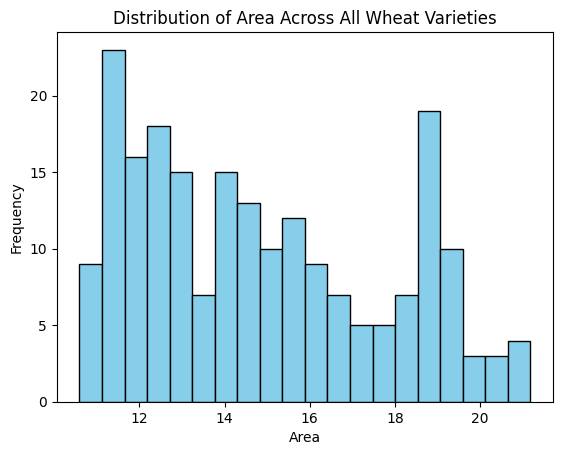

In [9]:
plt.hist(df['Area'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Area Across All Wheat Varieties')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.show()

---

## What is the correlation between different numerical features (e.g., Area, Perimeter, Kernel Length, etc.)?

In [10]:
correlation_matrix = df[['Area', 'Perimeter', 'Compactness', 'Kernel Length', 'Kernel Width', 
                         'Asymmetry Coefficient', 'Groove Length']].corr()

print(correlation_matrix)

                           Area  Perimeter  Compactness  Kernel Length  \
Area                   1.000000   0.994341     0.608288       0.949985   
Perimeter              0.994341   1.000000     0.529244       0.972422   
Compactness            0.608288   0.529244     1.000000       0.367915   
Kernel Length          0.949985   0.972422     0.367915       1.000000   
Kernel Width           0.970771   0.944829     0.761635       0.860415   
Asymmetry Coefficient -0.229572  -0.217340    -0.331471      -0.171562   
Groove Length          0.863693   0.890784     0.226825       0.932806   

                       Kernel Width  Asymmetry Coefficient  Groove Length  
Area                       0.970771              -0.229572       0.863693  
Perimeter                  0.944829              -0.217340       0.890784  
Compactness                0.761635              -0.331471       0.226825  
Kernel Length              0.860415              -0.171562       0.932806  
Kernel Width               

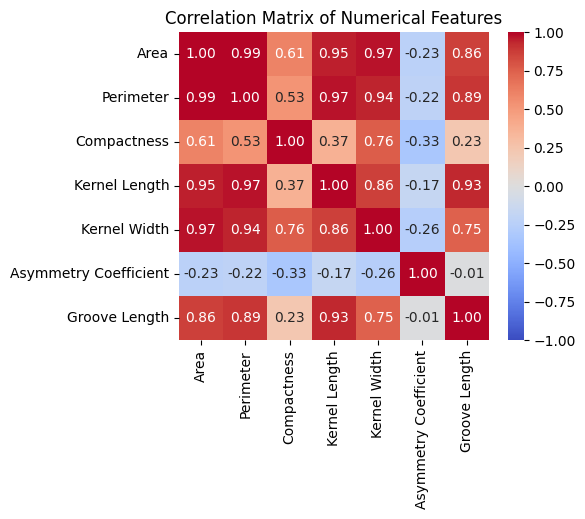

In [11]:
plt.figure(figsize=(5,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

---

## Are there any outliers in the "Area" for each wheat variety?

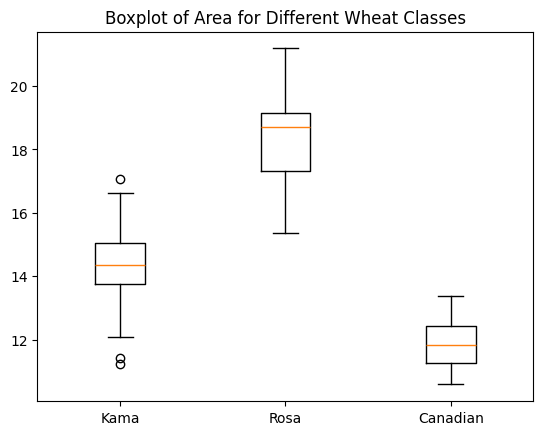

In [12]:
data = [df[df['Class'] == 'Kama']['Area'], 
        df[df['Class'] == 'Rosa']['Area'], 
        df[df['Class'] == 'Canadian']['Area']]

plt.boxplot(data, labels=['Kama', 'Rosa', 'Canadian'])
plt.title('Boxplot of Area for Different Wheat Classes')
plt.show()

### Only the Kama class has outliers in the Area feature, while both Rosa and Canadian do not have any outliers.

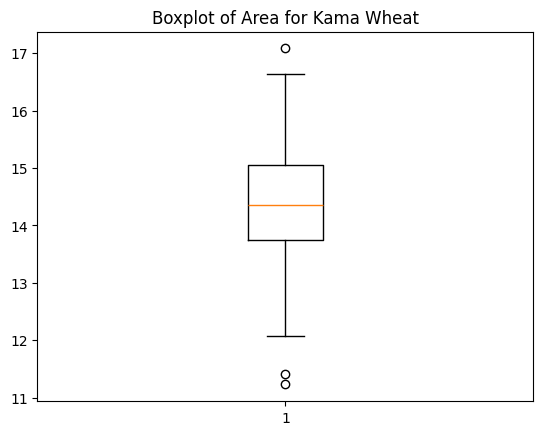

In [13]:
kama_data = df[df['Class'] == 'Kama']['Area']

plt.boxplot(kama_data)
plt.title('Boxplot of Area for Kama Wheat')
plt.show()

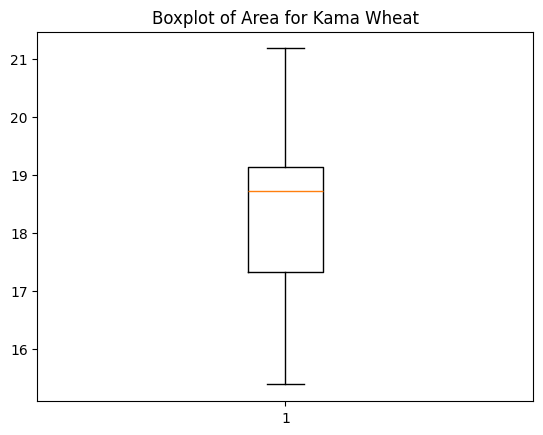

In [14]:
kama_data = df[df['Class'] == 'Rosa']['Area']

plt.boxplot(kama_data)
plt.title('Boxplot of Area for Kama Wheat')
plt.show()

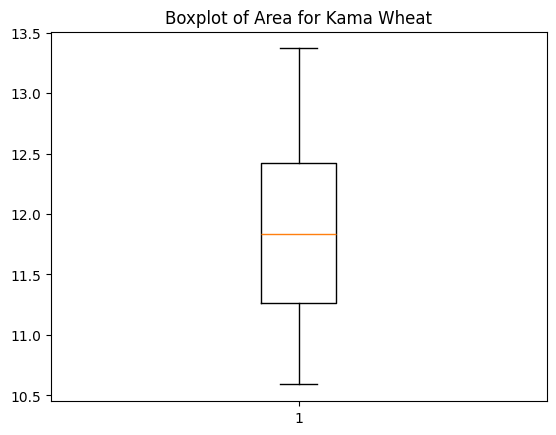

In [15]:
kama_data = df[df['Class'] == 'Canadian']['Area']

plt.boxplot(kama_data)
plt.title('Boxplot of Area for Kama Wheat')
plt.show()

In [16]:
# Function to identify outliers
def find_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

# Find outliers for each class
kama_outliers = find_outliers(df[df['Class'] == 'Kama']['Area'])
rosa_outliers = kama_outliers
rosa_outliers

37    17.08
60    11.42
61    11.23
Name: Area, dtype: float64

In [17]:
# Function to identify outliers
def find_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

# Find outliers for each class
kama_outliers = find_outliers(df[df['Class'] == 'Rosa']['Area'])
rosa_outliers = kama_outliers
rosa_outliers

Series([], Name: Area, dtype: float64)

In [18]:
# Function to identify outliers
def find_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

# Find outliers for each class
outliers_by_class = {}
for class_name, group in df.groupby('Class'):
    outliers_by_class[class_name] = find_outliers(group['Area'])

# Print outliers for each class
for class_name, outliers in outliers_by_class.items():
    print(f"{class_name} Outliers:")
    print(outliers)


Canadian Outliers:
Series([], Name: Area, dtype: float64)
Kama Outliers:
37    17.08
60    11.42
61    11.23
Name: Area, dtype: float64
Rosa Outliers:
Series([], Name: Area, dtype: float64)
